---
Entendendo o problema
---


#### Em primeira instância:
- Precisamos entender o contexto do problema que estamos analisando.
- Qual tipo de problema é: classificação ou regressão?
- Por que está sendo feito este estudo (qual é nosso objetivo)?
- Qual medida de desempenho iremos utilizar para dizer se nosso modelo está realmente com uma alta acurácia e precisão?


#### Segunda instância:

- Fazer a análise exploratória dos dados:
    - Verificar se há valores faltantes e decidir como lidar com eles.
    - Identificar as colunas numéricas e categóricas.
    - Analisar a distribuição dos dados usando `df.describe()`. Se necessário, utilizar histogramas para uma análise visual mais detalhada com `df.hist()`.
    - Verificar se os gráficos apresentam alguma anomalia, como cauda longa à direita, concentração em um ponto ou distribuições muito concentradas.


# Nivel 1
Após isso podemos fazer a parte mais importante para nosso modelo se tornar um modelo minimamente de nivel 1, separar o conjunto de dados em treinamento e teste.

#### Alguns tipos de separação de dados:

- Separação por valor de hash: É um metodo que consiste em seperar os dados para que não haja contaminação de conjunto no conjunto de teste ao fazer uma nova amostragem de dados caso necessarios.

- Seperação estratificada: Imagine a seguinte questão em uma das colunas eu tenho o dado se a pessoa é menor de 18 e maior de 18, mas não necessariamente sei se isso vai causar algum tipo de impacto a analise que será feita, mas possivelmente sempre será uma boa opção segregar os dados de forma uniforme por exemplo no conjunto de treino terá a mesma quantidade proporcional que no conjunto de teste, para que assim não haja um enviasamento de dados.

#### Após a separação é de extrema importância que só o conjunto de treinamento seja utilizado não devemos nunca tocar no conjunto de teste apenas na hora de testar o nosso modelo.

- Caso uma contaminação ou um mal uso do conjunto de teste seja feito ele automaticamente se torna no conjunto de treino e temos que obter um novo conjunto de dados para que possamos testar posteriormente.


#### Explorar e entender melhor os dados que temos em mão:

- Visualizar e analisar cada coluna e suas correlações para podermos entende-las melhor.
- Preparar os dados para o estudo se necessario.
- Escolher um bom conjunto de modelos para o problema em questão, sendo ele de regressão ou classificação.
- Treinar modelos e posteriormente fazer ajustes finos dos hiperparâmetros do modelo em si.


##### Preparar os dados para o modelo:

- Separar a variável dependente das variáveis indepentes para que possamos fazer as analises.
- Criar novas colunas conforme os dados que nos temos para que isso possa nos auxiliar na analise mais aprofundada dos dados.
- Transformar as variaveis categoricas em numericas (Seção - Codificando variáveis categóricas). *1
- Tomar decisões necessarias sobre os possiveis valores faltantes do dataset.

    - 1. Remover a coluna inteira de dados faltantes, ou
        - 1.1 Esta coluna não é importante para nossa analise?

        - 1.2 Esta coluna não aprensenta nenhuma correlação com outra que as duas juntas podem nos trazer informações importantes?
        
    - 2. Remover as linhas onde estão faltando dados, ou
        - 2.1 Como isso pode nos afetar?
        
        - 2.2 Não são muitas linhas para simplesmente se eliminar?

    - 3. Preencher os buracos
        - 3.1 Preenche com zeros

        - 3.2 Treinar um modelo de machine learning para prever os valores desta coluna e usar o modelo para preencher os espaços! Trata-se de uma forma mais sofisticada de interpolação.

        - 3.3 Usar alguma estatística do dataset, como a mediana (IMPUTER)


#### Manipulando os dados:

*1 Se formos fazer um OneHotEnconder precisamos lembrar de sempre dropar uma das categoricas.


Se Atentar a ColumnTransformer e Pipelines.

#### Construindo modelos preditivos:

- Na hora de aplicarmos o Fit em um modelo preditivo usamos model.fit(X,Y) sendo X as variveis independentes e Y a variavel dependente.
- Quando começamos a validade se as familias de modelo que escolhemos é realmente boa para o problema em questão, podemos testar eles no conjunto de treinamente e vermos como os modelos escolhidos se comportam, para que assim possamos tomar a decisão de quais ou qual modelo seria o mais adequado para prosseguirmos treinando.
- Devemos sempre tomar cuidado com overfitting ou underfitting.
- Testamos o modelo com os erros absolutos e a medida de desempenho escolhida lá no começo.


#### Nivel 2:

- Validação cruzada é uma boa forma para que possamos testar os modelos escolhidos sem termos que tocar no conjunto de teste, passos para isso ser feito:
    - Separamos novamente o conjunto de treinamento em 2, será o conjunto de treinamento e outro que será o conjunto de validação.
    - Fazemos os teste multiplas vezes com conjuntos diferentes intercalando cada grupo de treino, validação com a função cross_val_score(model, adjusted_df, Y_df, error_measure, quantity_test)
    - Teste paramétrico (tteste_ind), sendo p-value < 0.05 significante podendo nos dizer que a hipotese é valida.
    - Teste não parametrico, teste de permutação onde fazemo uma analise utilizamos 2 amostras e reamostramos elas aleatoriamente para fazer essa comparação se o modelo é realmente melhor ou é simplesmente uma coincidência.

    
    ![Ilustração teste permutação](perm_orig.png "Teste de permutação: configuração original")

    
    ![Ilustração teste permutação](perm_perm.png "Teste de permutação: configuração permutada")

#### Ajuste de Hiper Parâmetros:

- Um modelo por si só é bom, mas podemos fazer ajustes finos neles que podem mudar completamente oque eles nos dizem geralmente simplesmente otimizamos o melhor modelo encotrado com o objetivo de maximizar seu desempenho esses ajustes vem com o multiplicador das features. Isso pode melhorar significantemente o nosso modelo existem formas de fazer isso por meio de calculos em alguns modelos porém em sua maioria temos que testar eles manualmente "BRUTE FORCE" gridSearch para testar um conjunto de hiperparamentros e ver quais desempenham melhor.

---


**Funções Relevantes**


---



In [2]:
from scipy.stats import percentileofscore
import numpy as np
def permutation_test(sample_1, sample_2, n_permutations=100):
    diff_orig = np.mean(sample_1)- np.mean(sample_2)
    n1 = len(sample_1)

    # Junta as amostras em um grande array unificado.
    pooled_samples = np.concatenate((sample_1, sample_2))

    diffs = []
    for i in range(n_permutations):
        # Embaralha o grande array unificado e separa duas amostras fake.
        np.random.shuffle(pooled_samples)
        m1 = np.mean(pooled_samples[:n1])
        m2 = np.mean(pooled_samples[n1:])
        
        # Guarda a diferença de médias.
        diffs.append(m1 - m2)

    # Determina o percentil em que se localizava a diferença de médias original.
    q = percentileofscore(diffs, diff_orig) / 100.0
    if q < 0.5:
        pvalue = 2*q
    else:
        pvalue = 2*(1 - q)
        
    return pvalue

In [1]:
def display_scores(scores):
    print("Scores (ordenados): [{}]".format(" ".join(["{:.2f}".format(x) for x in sorted(scores)])))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

---
### Introdução a modelagem de Classificação:
---

- Cuidados ao tomar decisões iniciais sobre um conjunto de dados recolhidos:
    - Deve-se ter cuidado para não selecionar apenas um conjunto de dados (grupo).
    - Mas de mesma forma temos que ter cuidado para não segregar demais senão teremos um modelo muito tombado para apenas um lado da solução.
    - Deve-se padronizar como os dados serão processados para evitar possiveis erros de incompatibilidade ocasional.
    - Ao fazer analises primeiro precisamos entender o "contexto social" (sobre oque e onde estamos fazendo esse modelo).

- Ao fazermos modelos de Classificação precisamos escolher familias de modelos para podermos começar a analise de algum lugar, de mesma forma como fazemos nos modelos de regressão.
- Neste tipo de modelagem tabem podemos fazer a validação cruzada para atribuirmos uma metrica de desempenho ao modelo.

---
#### Analises dummies, em modelos de classificação principalmente:
---

Ao analisar puramente modelos de classificação binária onde temos que dizer uma coisa é ou não é ou coisas do tipo temos que tomar cuidado com dummies acurracy, se trata de uma acuracia minima do modelo por si só, vamo supor o seguinte senario temos um dataset para definir se um gato é um gato ou não, mas neste datase temos 100 especimes de animais portanto 1 delas tem que ser o gato, para efeito de proporcionalidade o dataset foi montado igualitariamente em quantidade iguais de cada especime, portanto mesmo que chutemos que todos os animais não são gatos teriamos um accuracy de 99% oque em primeira instância pode parecer bom, mas ao vermos dessa forma que 99% do dataset necessariamente não são gatos então esse seria o acurracy minimo.






---
#### Precison, Recall e média harmônica.
---

- **TP**: Os valores **verdadeiramente positivos** e que foram **preditos como positivos** são os **true positives** (verdadeiros positivos).

- **FN**: Os valores **verdadeiramente positivos** e que foram **preditos como negativos** são os **false negatives** (falsos negativos, pois foram errôneamente classificados como negativos).

- **TN**: Os valores **verdadeiramente negativos** e que foram **preditos como negativos** são os **true negatives** (verdadeiros negativos).

- **FP**: os valores **verdadeiramente negativos** e que foram **preditos como positivos** são os **false positives** (falsos positivos, pois foram errôneamente classificados como positivos).


---
##### Recall

- Um alto recall indica que nosso modelo é muito bom em classificar positivos que são realmente positivos.
- Em contra partida ele pode acaba identificando negativos como positivos tambem, sendo assim gerando muitos falso positivos.

Em que situação isso é interessante?
- Uma situação onde isso pode ser muito interessante é em um teste para ver se uma pessoa está contaminada com uma doença contagiosa ou não, é melhor falar que todos estão e eles ficarem em casa mesmo estando saudaveis do que vc ter alguem com essa doença andando por ai.


$$\text{recall} = \frac{TP}{TP + FN}$$

---
##### Precision

- Um alto precision é justamente o inverso só falamos que um positivo é um positivo quando ele claramente é um positivo.
- Em  contra partida ele pode acabar identificando alguns positivos como negativos por serem um pouco diferentes dos positivos esperados.

Em que situação isso é interessante?

- Em situações onde precisam ser muito acertivas e não aceitam falsos positivos, por exemplo "Suponha que você é um médico e tem um teste que é usado para detectar uma doença muito rara que afeta apenas 1 em cada 1.000.000 de pessoas. Nesse caso, você gostaria que o teste tivesse uma alta precisão, porque um resultado positivo no teste pode ser muito alarmante para o paciente."

$$\text{precision} = \frac{TP}{TP + FP}$$
---

#### Média harmônica.

- Média harmônica se trata de uma medida de equilibrio entre Precision e Recall ela seria o pico do grafico antes de cair apontando para o Recall ou Precision.


$$F_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$$



- Mas na maioria dos casos tendemos a preferir um ou outro dependendo da situação, sendo que quanto maior o precision menor o recall e vice versa, por isso temos que definir o famoso threshold o quão aceitavel é o valor de Precision ou o valor de Recall.


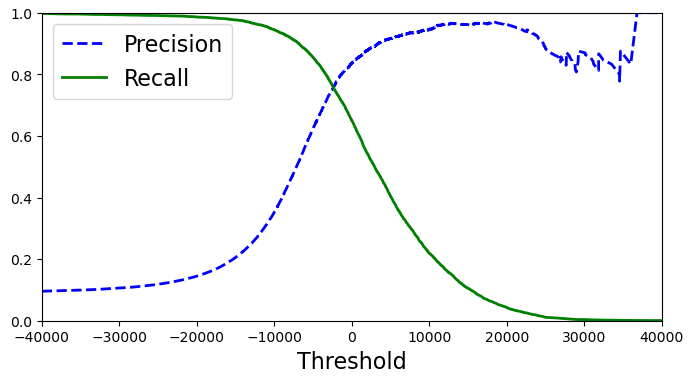
O ponto de encontro entre a duas curvas seria o F1.

---

#### Sensibildiade, especificidade e curva ROC.


##### 1. Sensibilidade:

- True Positive Rate, tambem conhecido como sensibilidade é quantos positivos eu detectei com base em todos os positivos existentes.
$$\text{TPR} = \text{recall} = \text{sensitivity} = \frac{\text{TP}}{\text{P}} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

##### 2. Especificidade:

- True Negative Rate, tambem conhecido como especificidade é quantos negativos eu detectei com base em todos os negativos existentes.

$$\text{TNR} = \text{specificity} = \frac{TN}{N} = \frac{TN}{TN + FP}$$


##### 3. Curva Roc:

- A curva ROC (Receiver Operating Characterístic), se trata de uma relação entre todos os pares de (FPR,TPR) de um classificador binário.
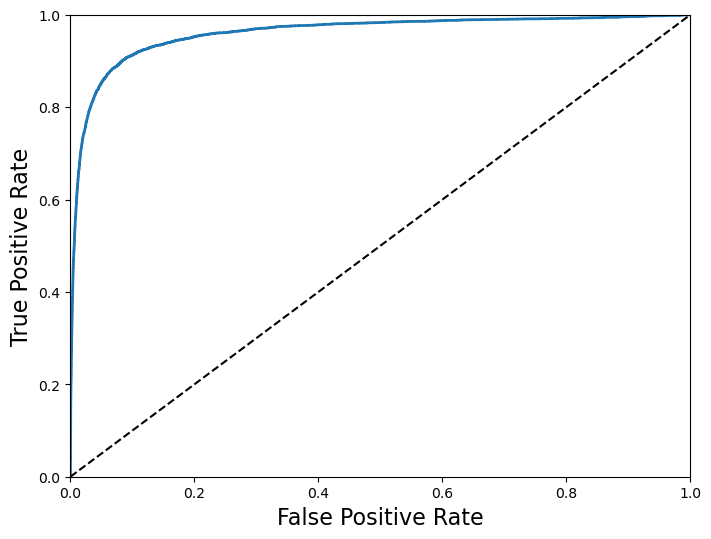

- Ou seja qualquer classificador minimamente bom tera um curva acima da curva tracejada (ROC) atraves da Area que ele assume temos como teorizar o desempenho de um modelo, sendo ele mais proximo de 1 melhor ele é.


---

### Classificação One-versus-One e One-versus-All:

Em muitos classificadores binarios se torna cada vez mais complexo prever se algo é positivo ou não conforme o numero de amostras binárias escala a se torna mais preferivel escolhermos o One Versus One. Já em casos mais simplistas o One-versus-All pode desempenhar melhor.

#### One Versus One:
- Neste caso comparamos classe por classe para obtermos resultados melhores porem isso se torna mais custoso.

#### One Versus All:
- Já neste temos a comparação de varios por varios assim obtendo uma resposta mais rapida mas talvez menos precisa em um numero grande de amostras binárias.


#### Conceitual
- Correlação de Spearman: A correlação de Spearman é uma correlação que analisa uma relação monotônica entre duas variaveis sendo Ordinais ou continuas, ela nós da se a correlação das duas variaveis são positivas (diretamente proporcional ou inversamente proporcional) e se elas são de alta intensidade ou de baixa intensidade, sendo de -1 a +1.
- Correlação de Kendall: É uma correlação classificatoria, indo de -1 a 1 seguindo a mesma logica da correlação de Spearman.


Ambas correlações são correlações alternativas para a correlação de Pearson quando a obrigações da mesma não são atendidas, elas sendo serem uma correlação entre uma variável dependente e cada uma das variáveis independentes e serem linearmente dependentes.